## I used most of the code which Prof.Amit sir has given us in smart_monkey videos.
##And some syntax i found sklearn page and pandas page.

##Question 1

In [ ]:
# importing common libraries 

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.metrics import classification_report

Importing the red winequality file csv file

In [ ]:
from google.colab import files  #colab-specific library to load files
uploaded = files.upload()  

for fn in uploaded.keys():
    print('You uploaded file "{name}" with length {length} bytes'.format(name=fn,length=len(uploaded[fn])))


Saving winequality-red.csv to winequality-red.csv
You uploaded file "winequality-red.csv" with length 84199 bytes


##Explore, visualize, and pre-process  of the data

In [ ]:
df = pd.read_csv("winequality-red.csv")   ##Read a comma-separated values (csv) file into DataFrame
df

,"fixed acidity;""volatile acidity"";""citric acid"";""residual sugar"";""chlorides"";""free sulfur dioxide"";""total sulfur dioxide"";""density"";""pH"";""sulphates"";""alcohol"";""quality"""
0,7.4;0.7;0;1.9;0.076;11;34;0.9978;3.51;0.56;9.4;5
1,7.8;0.88;0;2.6;0.098;25;67;0.9968;3.2;0.68;9.8;5
2,7.8;0.76;0.04;2.3;0.092;15;54;0.997;3.26;0.65;...
3,11.2;0.28;0.56;1.9;0.075;17;60;0.998;3.16;0.58...
4,7.4;0.7;0;1.9;0.076;11;34;0.9978;3.51;0.56;9.4;5
...,...
1594,6.2;0.6;0.08;2;0.09;32;44;0.9949;3.45;0.58;10.5;5
1595,5.9;0.55;0.1;2.2;0.062;39;51;0.99512;3.52;0.76...
1596,6.3;0.51;0.13;2.3;0.076;29;40;0.99574;3.42;0.7...
1597,5.9;0.645;0.12;2;0.075;32;44;0.99547;3.57;0.71...


##Data is not looking good .I have to split the data into columns.

In [ ]:
df = pd.read_csv("winequality-red.csv",delimiter=';')  ##string can be divided into sub strings by using delimeter
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


Different columns have different scales.

In [ ]:
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

All datatypes are int or float 


In [ ]:
df.nunique()  ##Checking for unique values in each column

fixed acidity            96
volatile acidity        143
citric acid              80
residual sugar           91
chlorides               153
free sulfur dioxide      60
total sulfur dioxide    144
density                 436
pH                       89
sulphates                96
alcohol                  65
quality                   6
dtype: int64

In [ ]:
df.isna().sum()  ##Checking for total NA in a column

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

None of the columns have null values.
Only quality has few unque values.

Plotting histogram for discrete variables.

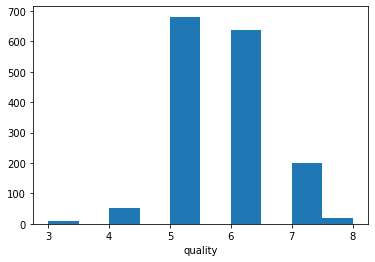

In [ ]:
for col in df.columns.values: #for all columns
  #if the values are integer or discrete
  if(df[col].dtypes == 'int64') | (df[col].dtypes == 'object'):
    plt.hist(df[col])
    plt.xlabel(col)
    plt.show()

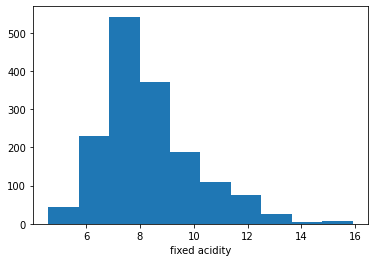

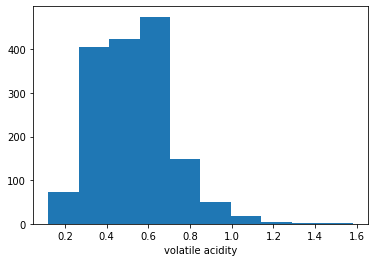

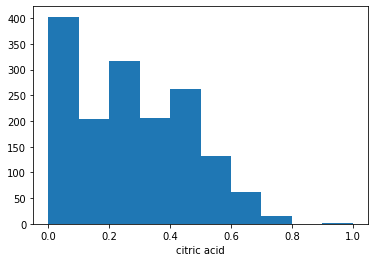

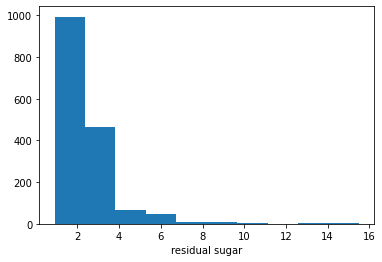

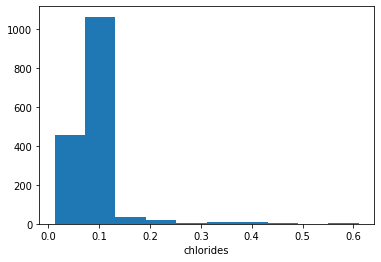

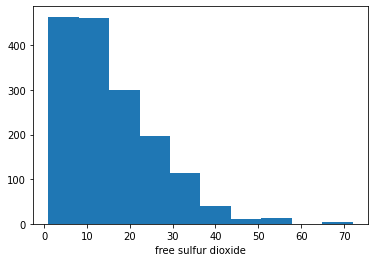

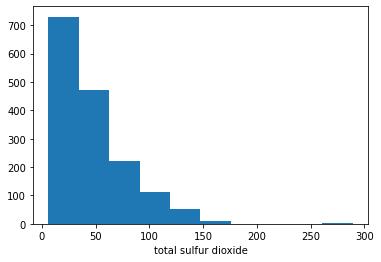

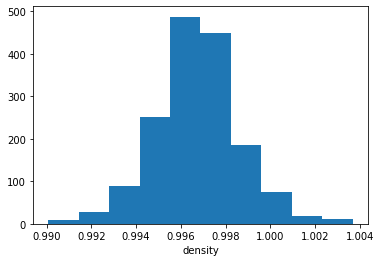

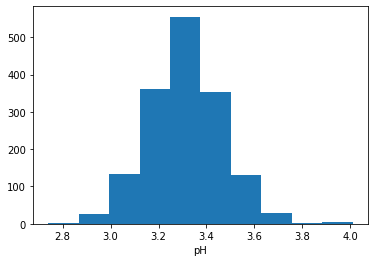

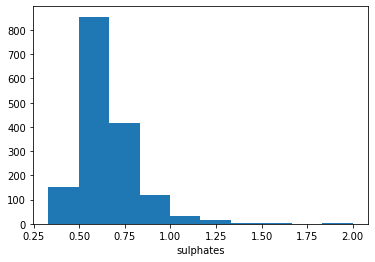

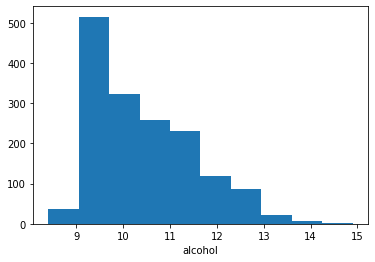

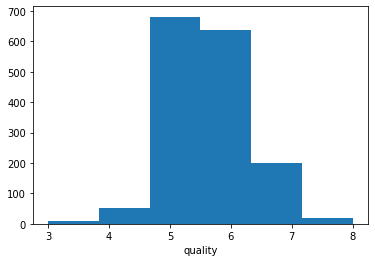

In [ ]:
#plot histograms for continuous variables

for col in df.columns.values: #for all columns
  #if the values are integer or discrete
  if(df[col].dtypes == 'int64') | (df[col].dtypes == 'float64'):
    plt.hist(df[col],10 if len(pd.unique(df[col]))>20 else len(pd.unique(df[col])))
    plt.xlabel(col)
    plt.show()

All variables seems to spread well.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa4b2d49588>,
      dtype=object)

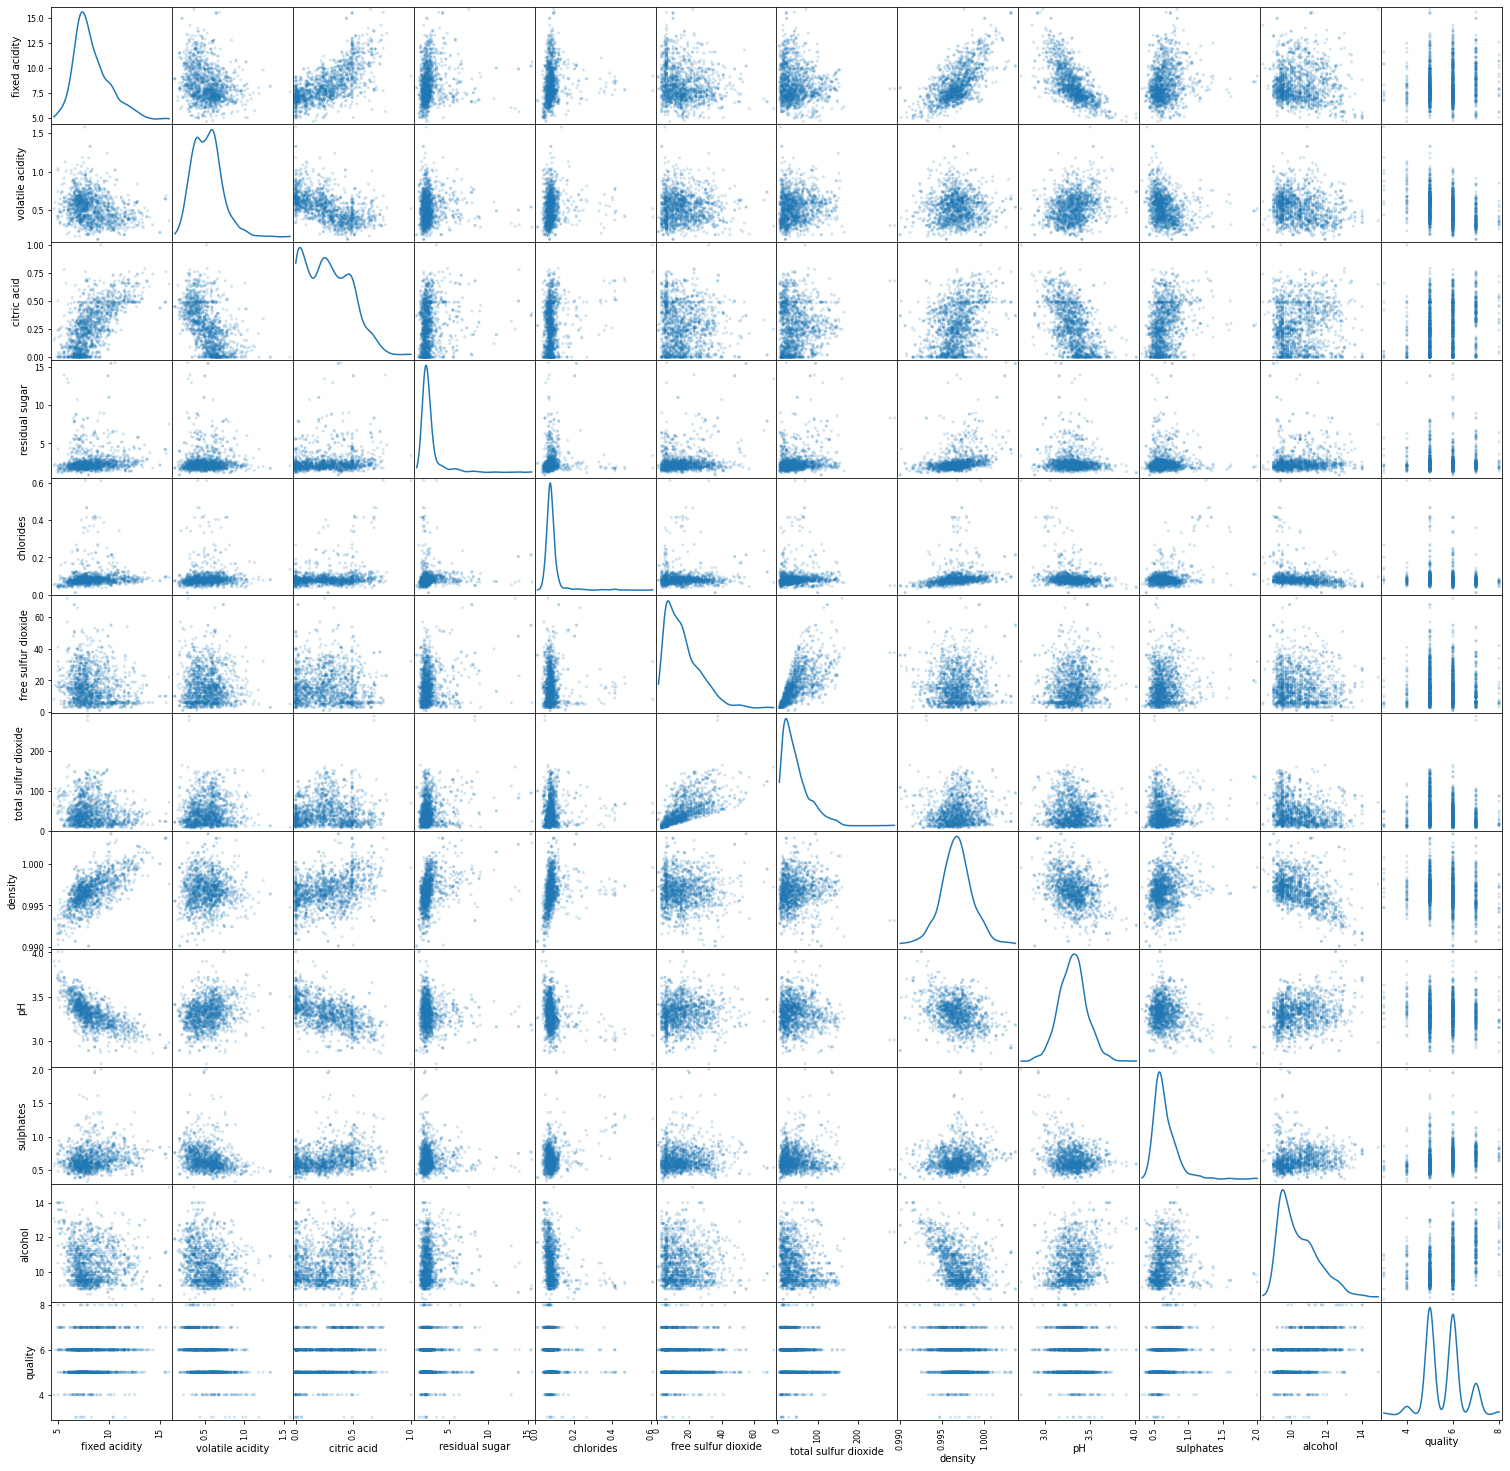

In [ ]:
#we can also plot pairwise scatter matrices(lazy coding)

from pandas.plotting import scatter_matrix
scatter_matrix(df,alpha=0.2,figsize=(26,26),diagonal='kde')  #kde is kernal density estimation

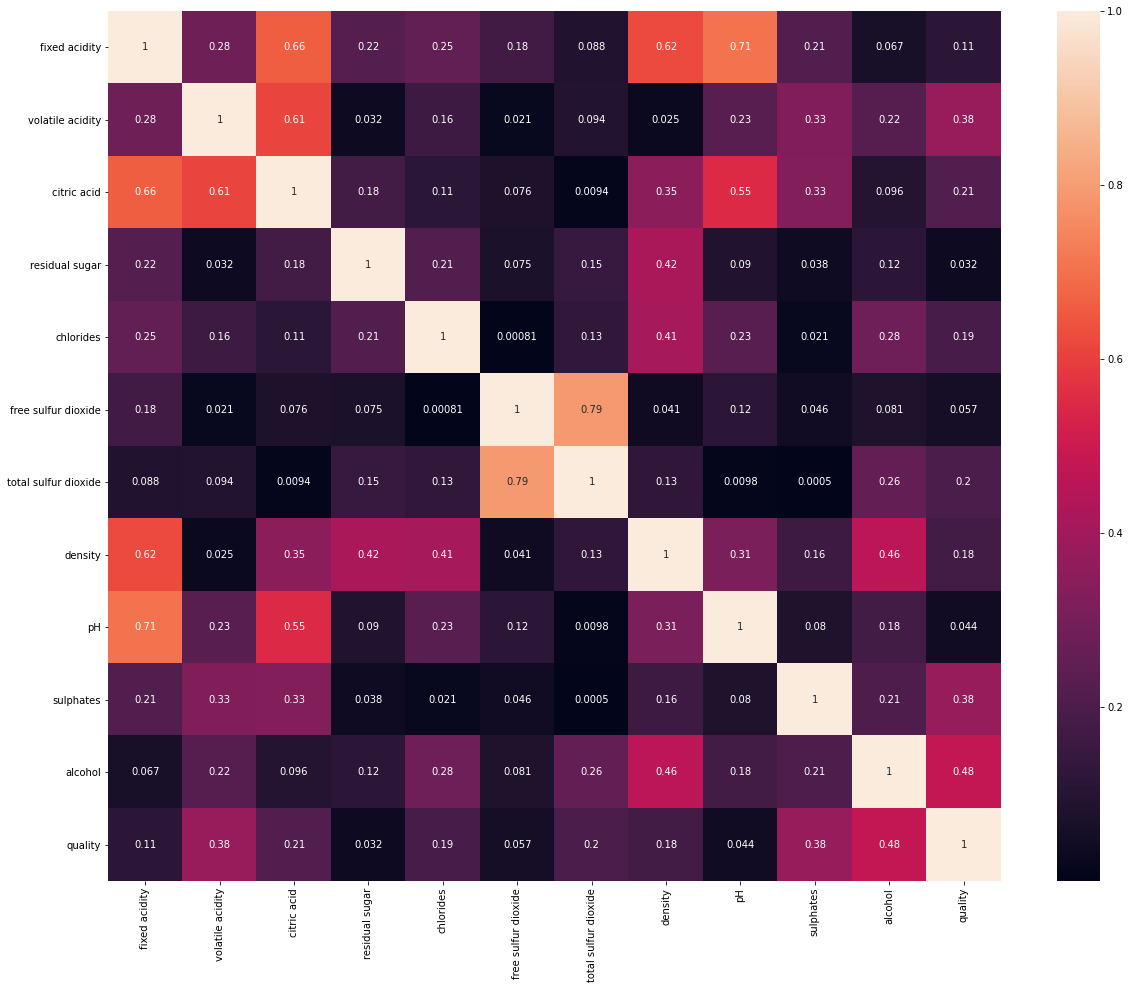

In [ ]:
corrMatrix=df.corr(method='spearman') #Use spearman for non-linear
fig,ax=plt.subplots(figsize=(20,16))
sns.heatmap(abs(corrMatrix),annot=True) #show absolute value
plt.show()

Free sulphur dioxide and total sulphur dioxide are correlated.


/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is de

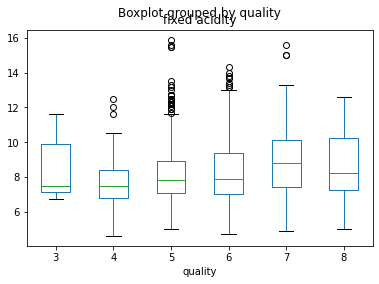

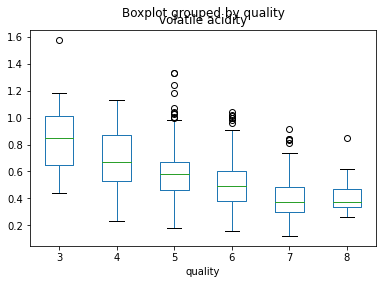

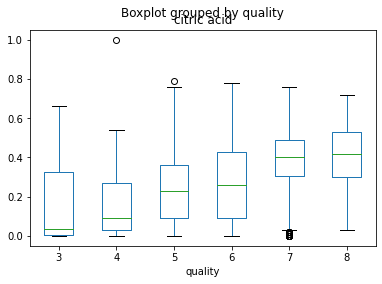

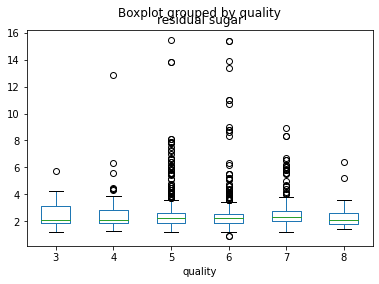

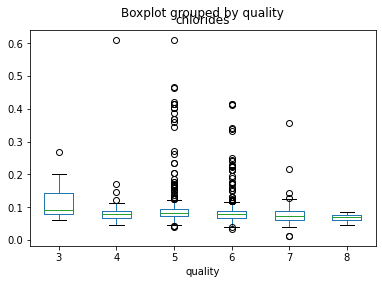

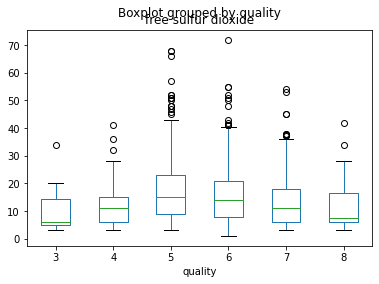

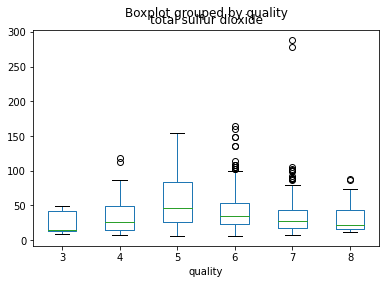

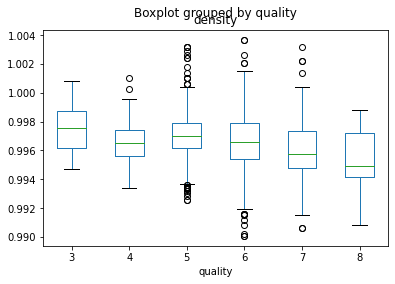

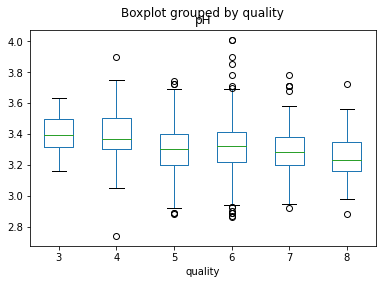

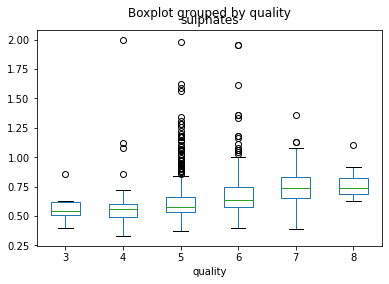

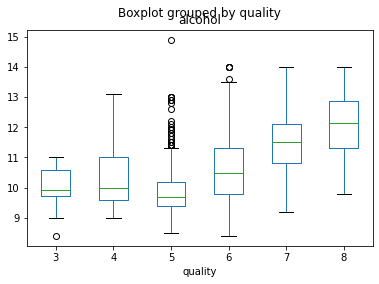

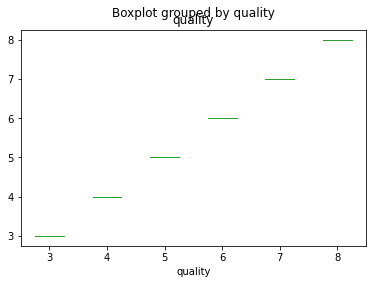

In [ ]:
#Plot side by side boxplot for each variable to find which ones are likely to help predict classes

for col in df.columns.values:
    df.boxplot(by='quality',column=col, grid=False)

residual sugar can be eliminated.
and free sulphur di oxide can also be igonored because of correlation with total sulphur di oxide.




##Prepare Data
Elimination of useless columns.

Normalize ranges



In [ ]:
X_red = df.drop(['residual sugar','free sulfur dioxide','chlorides','quality'],axis='columns')  ##my input columns  
y_red = df.quality

,0,1,2,3,4,5,6,7
0,-0.528360,0.961877,-1.391472,-0.379133,0.558274,1.288643,-0.579207,-0.960246
1,-0.298547,1.967442,-1.391472,0.624363,0.028261,-0.719933,0.128950,-0.584777
2,-0.298547,1.297065,-1.186070,0.229047,0.134264,-0.331177,-0.048089,-0.584777
3,1.654856,-1.384443,1.484154,0.411500,0.664277,-0.979104,-0.461180,-0.584777
4,-0.528360,0.961877,-1.391472,-0.379133,0.558274,1.288643,-0.579207,-0.960246
...,...,...,...,...,...,...,...,...
1594,-1.217796,0.403229,-0.980669,-0.075043,-0.978765,0.899886,-0.461180,0.072294
1595,-1.390155,0.123905,-0.877968,0.137820,-0.862162,1.353436,0.601055,0.729364
1596,-1.160343,-0.099554,-0.723916,-0.196679,-0.533554,0.705508,0.542042,0.541630
1597,-1.390155,0.654620,-0.775267,-0.075043,-0.676657,1.677400,0.305990,-0.209308


0    3.435512e-16
1    1.699704e-16
2    4.335355e-16
3    1.289532e-16
4    2.336509e-14
5    3.002879e-15
6    7.639596e-16
7    9.437243e-16
dtype: float64


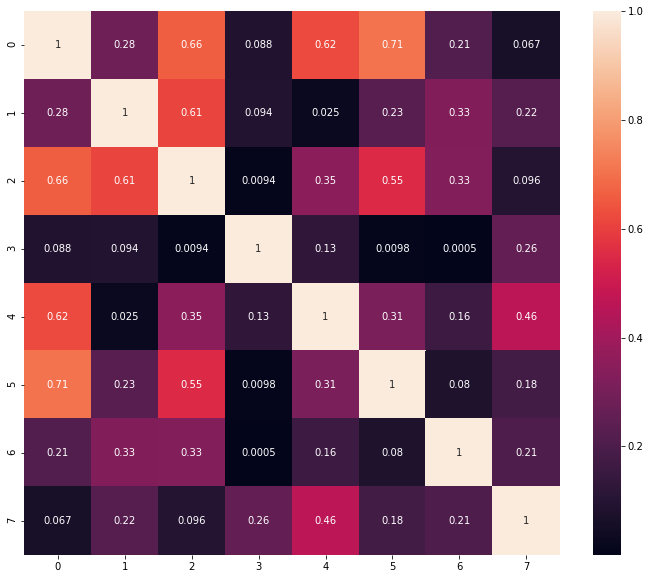

In [ ]:
#normalize data (shift and scale so that columns are 0 mean and unit variance)
from sklearn import preprocessing

scaler=preprocessing.StandardScaler() #for data normalisation

scaler.fit(X_red) #compute mean and standard deviation
X_red_norm =pd.DataFrame(scaler.transform(X_red)) #use mean and std
display(X_red_norm)
print(X_red_norm.mean())

corrMatrix=X_red_norm.corr(method='spearman') #check correlation again
fig,ax=plt.subplots(figsize=(12,10))
sns.heatmap(abs(corrMatrix),annot=True) 
plt.show()

All means are zero and std deviation are 1.

variables selected seems to uncorrelated with each other.

##Splitting of data

In [ ]:
from sklearn.model_selection import train_test_split
train_X_red, test_X_red, train_y_red, test_y_red = train_test_split(X_red_norm, y_red,test_size=0.2, random_state=42) ##splitting test data into 20 percent
train_y_red

493     6
354     6
342     6
834     5
705     5
       ..
1130    6
1294    6
860     5
1459    7
1126    6
Name: quality, Length: 1279, dtype: int64

##L1(Lasso) regularied 

In [ ]:
from sklearn import linear_model
lasso_reg = linear_model.Lasso(alpha=0.01)
lasso_reg.fit(train_X_red, train_y_red)         ##training model
print('score of lasso :')
lasso_reg.score(test_X_red, test_y_red)         ##computing test score of model


score of lasso :


0.3904972496436725

##L1(LASSO) regularized linear regression using gridsearch

In [ ]:
#First we will use automated grid search over range of hyperparameters

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score  #ROC-AUC and F1 are balanced matrics

from sklearn import linear_model

In [ ]:
hyperparameters={'alpha':[0.005,0.01,0.1],'max_iter':[10,100,1000]}
#these are hyperparameters that we will try

lasso_reg = linear_model.Lasso()
clf_lasso=GridSearchCV(estimator=lasso_reg,param_grid=hyperparameters)
clf_lasso.fit(X_red_norm, y_red)
clf_lasso.cv_results_


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 73.68468424347566, tolerance: 0.08601501172791233
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 22.646494467456023, tolerance: 0.08224347146207972
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 55.461455185267255, tolerance: 0.08215605942142296
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 33.8

{'mean_fit_time': array([0.00380392, 0.00457525, 0.00341249, 0.00277748, 0.00242338,
        0.00248394, 0.002424  , 0.00354176, 0.00270281]),
 'mean_score_time': array([0.00252151, 0.00206447, 0.00180955, 0.00170403, 0.0016799 ,
        0.00169783, 0.00173583, 0.00208149, 0.0018806 ]),
 'mean_test_score': array([0.27470998, 0.2758003 , 0.2758003 , 0.27555514, 0.27611888,
        0.27611888, 0.24287711, 0.24287711, 0.24287711]),
 'param_alpha': masked_array(data=[0.005, 0.005, 0.005, 0.01, 0.01, 0.01, 0.1, 0.1, 0.1],
              mask=[False, False, False, False, False, False, False, False,
                    False],
        fill_value='?',
             dtype=object),
 'param_max_iter': masked_array(data=[10, 100, 1000, 10, 100, 1000, 10, 100, 1000],
              mask=[False, False, False, False, False, False, False, False,
                    False],
        fill_value='?',
             dtype=object),
 'params': [{'alpha': 0.005, 'max_iter': 10},
  {'alpha': 0.005, 'max_iter': 100}

cv_results are not easy to view hence i am geeting them into dataframes


In [ ]:
df1 = pd.DataFrame(clf_lasso.cv_results_)
df1.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,param_max_iter,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.003804,0.000791,0.002522,0.000260,0.005,10,"{'alpha': 0.005, 'max_iter': 10}",0.093980,0.308694,0.348388,0.358660,0.263828,0.274710,0.096346,6
1,0.004575,0.001497,0.002064,0.000225,0.005,100,"{'alpha': 0.005, 'max_iter': 100}",0.095654,0.310254,0.348815,0.359385,0.264894,0.275800,0.095996,3
2,0.003412,0.000831,0.001810,0.000212,0.005,1000,"{'alpha': 0.005, 'max_iter': 1000}",0.095654,0.310254,0.348815,0.359385,0.264894,0.275800,0.095996,3
3,0.002777,0.000400,0.001704,0.000155,0.01,10,"{'alpha': 0.01, 'max_iter': 10}",0.100616,0.309205,0.349736,0.355469,0.262749,0.275555,0.093583,5
4,0.002423,0.000090,0.001680,0.000048,0.01,100,"{'alpha': 0.01, 'max_iter': 100}",0.100409,0.310586,0.350239,0.355773,0.263588,0.276119,0.093870,1


In [ ]:
df1[['param_alpha','param_max_iter','mean_test_score']]

,param_alpha,param_max_iter,mean_test_score
0,0.005,10,0.274710
1,0.005,100,0.275800
2,0.005,1000,0.275800
3,0.01,10,0.275555
4,0.01,100,0.276119
5,0.01,1000,0.276119
6,0.1,10,0.242877
7,0.1,100,0.242877
8,0.1,1000,0.242877


In [ ]:
clf_lasso.best_params_

{'alpha': 0.01, 'max_iter': 100}

In [ ]:
clf_lasso.best_score_

0.27611888295175024

##L2(ridge) regularied 

In [ ]:
from sklearn import linear_model
ridge_reg= linear_model.Ridge(alpha=0.05, max_iter=100, tol=0.1)
ridge_reg.fit(train_X_red,train_y_red )

Ridge(alpha=0.05, copy_X=True, fit_intercept=True, max_iter=100,
      normalize=False, random_state=None, solver='auto', tol=0.1)

In [ ]:
ridge_reg.score(test_X_red, test_y_red)

0.3955396332029132

##L2(ridge) regularized linear regression using gridsearch

In [ ]:
hyperparameters={'alpha':[0.005,0.01,0.1],'max_iter':[10,100,1000]}
#these are hyperparameters that we will try

ridge_reg = linear_model.Ridge()
clf_ridge=GridSearchCV(estimator=ridge_reg,param_grid=hyperparameters)
clf_ridge.fit(X_red_norm, y_red)
clf_ridge.cv_results_


{'mean_fit_time': array([0.00747604, 0.00236087, 0.00215726, 0.00223427, 0.00227523,
        0.00219159, 0.00217457, 0.00224791, 0.00217967]),
 'mean_score_time': array([0.00257554, 0.00168033, 0.00158706, 0.00157938, 0.00174522,
        0.00155187, 0.00163608, 0.00163379, 0.00159941]),
 'mean_test_score': array([0.27413664, 0.27413664, 0.27413664, 0.2741369 , 0.2741369 ,
        0.2741369 , 0.2741417 , 0.2741417 , 0.2741417 ]),
 'param_alpha': masked_array(data=[0.005, 0.005, 0.005, 0.01, 0.01, 0.01, 0.1, 0.1, 0.1],
              mask=[False, False, False, False, False, False, False, False,
                    False],
        fill_value='?',
             dtype=object),
 'param_max_iter': masked_array(data=[10, 100, 1000, 10, 100, 1000, 10, 100, 1000],
              mask=[False, False, False, False, False, False, False, False,
                    False],
        fill_value='?',
             dtype=object),
 'params': [{'alpha': 0.005, 'max_iter': 10},
  {'alpha': 0.005, 'max_iter': 100}

In [ ]:
df2 = pd.DataFrame(clf_ridge.cv_results_)
df2.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,param_max_iter,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.007476,0.003231,0.002576,0.001041,0.005,10,"{'alpha': 0.005, 'max_iter': 10}",0.088157,0.308407,0.34668,0.362902,0.264538,0.274137,0.098992,7
1,0.002361,0.000111,0.001680,0.000145,0.005,100,"{'alpha': 0.005, 'max_iter': 100}",0.088157,0.308407,0.34668,0.362902,0.264538,0.274137,0.098992,7
2,0.002157,0.000013,0.001587,0.000035,0.005,1000,"{'alpha': 0.005, 'max_iter': 1000}",0.088157,0.308407,0.34668,0.362902,0.264538,0.274137,0.098992,7
3,0.002234,0.000070,0.001579,0.000032,0.01,10,"{'alpha': 0.01, 'max_iter': 10}",0.088158,0.308407,0.34668,0.362901,0.264538,0.274137,0.098991,4
4,0.002275,0.000069,0.001745,0.000255,0.01,100,"{'alpha': 0.01, 'max_iter': 100}",0.088158,0.308407,0.34668,0.362901,0.264538,0.274137,0.098991,4


In [ ]:
df2[['param_alpha','param_max_iter','mean_test_score']]

,param_alpha,param_max_iter,mean_test_score
0,0.005,10,0.274137
1,0.005,100,0.274137
2,0.005,1000,0.274137
3,0.01,10,0.274137
4,0.01,100,0.274137
5,0.01,1000,0.274137
6,0.1,10,0.274142
7,0.1,100,0.274142
8,0.1,1000,0.274142


In [ ]:
clf_ridge.best_params_

{'alpha': 0.1, 'max_iter': 10}

In [ ]:
clf_ridge.best_score_

0.27414170094354756

##SVC using grid search

In [ ]:
from sklearn import svm
clf_svc = GridSearchCV(svm.SVC(gamma='auto'), {
    'C': [1,10,20],
    'kernel': ['rbf','linear','poly']
}, cv=5, return_train_score=False)
clf_svc.fit(train_X_red, train_y_red)
clf_svc.cv_results_

{'mean_fit_time': array([0.05518894, 0.03834672, 0.04218874, 0.0689395 , 0.14038687,
        0.10340405, 0.07680779, 0.22177672, 0.17264061]),
 'mean_score_time': array([0.01059766, 0.00491009, 0.00571141, 0.00954328, 0.00484457,
        0.00540533, 0.00914202, 0.00514164, 0.00522614]),
 'mean_test_score': array([0.6138174 , 0.58643689, 0.60598039, 0.6208364 , 0.58565564,
        0.59656863, 0.62082108, 0.58565564, 0.59971814]),
 'param_C': masked_array(data=[1, 1, 1, 10, 10, 10, 20, 20, 20],
              mask=[False, False, False, False, False, False, False, False,
                    False],
        fill_value='?',
             dtype=object),
 'param_kernel': masked_array(data=['rbf', 'linear', 'poly', 'rbf', 'linear', 'poly',
                    'rbf', 'linear', 'poly'],
              mask=[False, False, False, False, False, False, False, False,
                    False],
        fill_value='?',
             dtype=object),
 'params': [{'C': 1, 'kernel': 'rbf'},
  {'C': 1, 'kernel'

In [ ]:
clf_svc.score(train_X_red,train_y_red) ##training accuracy

0.7599687255668491

In [ ]:
clf_svc.score(test_X_red,test_y_red)  ##testing accuracy

0.59375

In [ ]:
df3 = pd.DataFrame(clf_svc.cv_results_)
df3.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.083639,0.005534,0.014270,0.000132,1,rbf,"{'C': 1, 'kernel': 'rbf'}",0.553125,0.550000,0.659375,0.596875,0.586207,0.589116,0.039574,1
1,0.059412,0.008787,0.007157,0.000121,1,linear,"{'C': 1, 'kernel': 'linear'}",0.531250,0.515625,0.618750,0.578125,0.579937,0.564737,0.037043,6
2,0.064018,0.002903,0.008108,0.000125,1,poly,"{'C': 1, 'kernel': 'poly'}",0.528125,0.565625,0.618750,0.584375,0.529781,0.565331,0.034248,5
3,0.106112,0.007105,0.014048,0.000452,10,rbf,"{'C': 10, 'kernel': 'rbf'}",0.534375,0.537500,0.609375,0.575000,0.576803,0.566611,0.027891,2
4,0.180938,0.007112,0.007047,0.000077,10,linear,"{'C': 10, 'kernel': 'linear'}",0.531250,0.515625,0.618750,0.578125,0.583072,0.565364,0.037321,4


In [ ]:
df3[['param_C','param_kernel','mean_test_score']]

,param_C,param_kernel,mean_test_score
0,1,rbf,0.589116
1,1,linear,0.564737
2,1,poly,0.565331
3,10,rbf,0.566611
4,10,linear,0.565364
5,10,poly,0.537181
6,20,rbf,0.536595
7,20,linear,0.565989
8,20,poly,0.533435


In [ ]:
clf_svc.best_params_

{'C': 1, 'kernel': 'rbf'}

In [ ]:
clf_svc.best_score_

0.5891163793103449

##Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
hyperparameters={'n_estimators':[10,50,100],'max_depth':[50,100,200]}
#these are hyperparameters that we will try

random_forest = RandomForestClassifier()
clf_random_forest=GridSearchCV(estimator=random_forest,param_grid=hyperparameters)
clf_random_forest.fit(train_X_red, train_y_red)
clf_random_forest.cv_results_

{'mean_fit_time': array([0.02824397, 0.12647657, 0.24643769, 0.02626762, 0.12256455,
        0.24224305, 0.0259017 , 0.12298884, 0.24057693]),
 'mean_score_time': array([0.00270143, 0.00758934, 0.01396098, 0.0027267 , 0.00727968,
        0.0132977 , 0.00265012, 0.00748539, 0.01315846]),
 'mean_test_score': array([0.65363971, 0.6630576 , 0.67634804, 0.64741115, 0.66852022,
        0.67946998, 0.64426777, 0.68180453, 0.6841636 ]),
 'param_max_depth': masked_array(data=[50, 50, 50, 100, 100, 100, 200, 200, 200],
              mask=[False, False, False, False, False, False, False, False,
                    False],
        fill_value='?',
             dtype=object),
 'param_n_estimators': masked_array(data=[10, 50, 100, 10, 50, 100, 10, 50, 100],
              mask=[False, False, False, False, False, False, False, False,
                    False],
        fill_value='?',
             dtype=object),
 'params': [{'max_depth': 50, 'n_estimators': 10},
  {'max_depth': 50, 'n_estimators': 50},

In [ ]:
clf_random_forest.score(train_X_red, train_y_red)  ##training accuracy

1.0

In [ ]:
clf_random_forest.score(test_X_red, test_y_red)   ##testing accuracy

0.659375

In [ ]:
df4 = pd.DataFrame(clf_random_forest.cv_results_)
df4.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.029000,0.000568,0.003078,0.000614,50,10,"{'max_depth': 50, 'n_estimators': 10}",0.515625,0.553125,0.546875,0.534375,0.504702,0.530940,0.018335,8
1,0.138952,0.002980,0.008902,0.001236,50,50,"{'max_depth': 50, 'n_estimators': 50}",0.565625,0.556250,0.587500,0.565625,0.595611,0.574122,0.014863,1
2,0.280110,0.009766,0.014181,0.000206,50,100,"{'max_depth': 50, 'n_estimators': 100}",0.525000,0.584375,0.578125,0.590625,0.573668,0.570359,0.023392,3
3,0.029361,0.000801,0.003236,0.000945,100,10,"{'max_depth': 100, 'n_estimators': 10}",0.493750,0.553125,0.565625,0.546875,0.608150,0.553505,0.036736,7
4,0.136006,0.001991,0.007741,0.000172,100,50,"{'max_depth': 100, 'n_estimators': 50}",0.534375,0.546875,0.587500,0.550000,0.576803,0.559111,0.019817,5


In [ ]:
df4[['param_n_estimators','param_max_depth','mean_test_score']]

,param_n_estimators,param_max_depth,mean_test_score
0,10,50,0.530940
1,50,50,0.574122
2,100,50,0.570359
3,10,100,0.553505
4,50,100,0.559111
5,100,100,0.565378
6,10,200,0.517192
7,50,200,0.559103
8,100,200,0.571630


In [ ]:
clf_random_forest.best_score_

0.5741222570532916

## Impoting the white wine cv file here

In [ ]:
from google.colab import files  #colab-specific library to load files
uploaded = files.upload()  

for fn in uploaded.keys():
    print('You uploaded file "{name}" with length {length} bytes'.format(name=fn,length=len(uploaded[fn])))

Saving winequality-white.csv to winequality-white.csv
You uploaded file "winequality-white.csv" with length 264426 bytes


In [ ]:
df = pd.read_csv("winequality-white.csv")   ##Read a comma-separated values (csv) file into DataFrame
df

,"fixed acidity;""volatile acidity"";""citric acid"";""residual sugar"";""chlorides"";""free sulfur dioxide"";""total sulfur dioxide"";""density"";""pH"";""sulphates"";""alcohol"";""quality"""
0,7;0.27;0.36;20.7;0.045;45;170;1.001;3;0.45;8.8;6
1,6.3;0.3;0.34;1.6;0.049;14;132;0.994;3.3;0.49;9...
2,8.1;0.28;0.4;6.9;0.05;30;97;0.9951;3.26;0.44;1...
3,7.2;0.23;0.32;8.5;0.058;47;186;0.9956;3.19;0.4...
4,7.2;0.23;0.32;8.5;0.058;47;186;0.9956;3.19;0.4...
...,...
4893,6.2;0.21;0.29;1.6;0.039;24;92;0.99114;3.27;0.5...
4894,6.6;0.32;0.36;8;0.047;57;168;0.9949;3.15;0.46;...
4895,6.5;0.24;0.19;1.2;0.041;30;111;0.99254;2.99;0....
4896,5.5;0.29;0.3;1.1;0.022;20;110;0.98869;3.34;0.3...


##Data is not looking good .I have to split the data into columns.

In [ ]:
df_white = pd.read_csv("winequality-white.csv",delimiter=';')  ##string can be divided into sub strings by using delimeter
df_white

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


In [ ]:
df_white.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [ ]:
df_white.nunique()  ##Checking for unique values in each column

fixed acidity            68
volatile acidity        125
citric acid              87
residual sugar          310
chlorides               160
free sulfur dioxide     132
total sulfur dioxide    251
density                 890
pH                      103
sulphates                79
alcohol                 103
quality                   7
dtype: int64

In [ ]:
df_white.isna().sum()  ##Checking for total NA in a column

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

None of the columns have null values.
Only quality has few unque values.

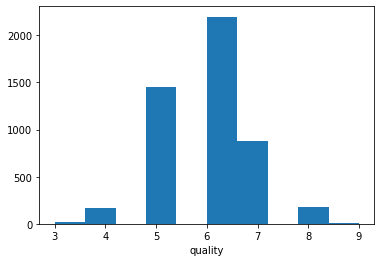

In [ ]:
for col in df_white.columns.values: #for all columns
  #if the values are integer or discrete
  if(df_white[col].dtypes == 'int64') | (df_white[col].dtypes == 'object'):
    plt.hist(df_white[col])
    plt.xlabel(col)
    plt.show()

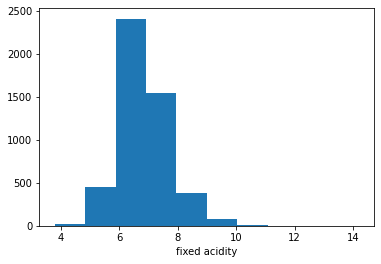

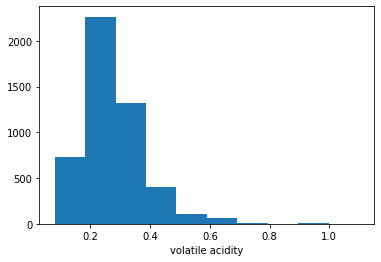

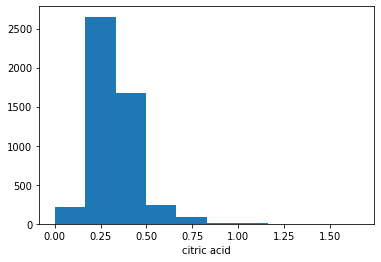

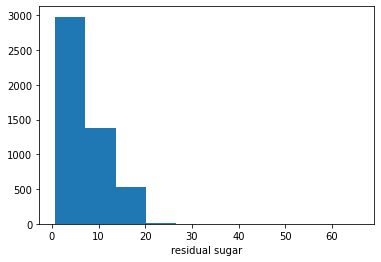

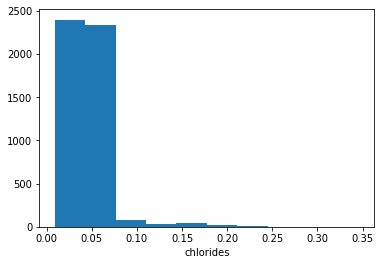

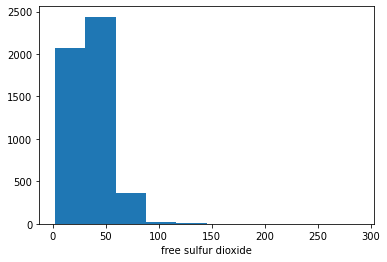

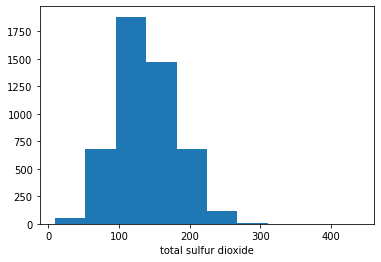

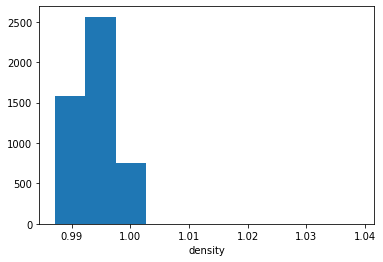

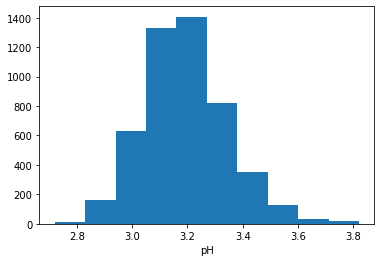

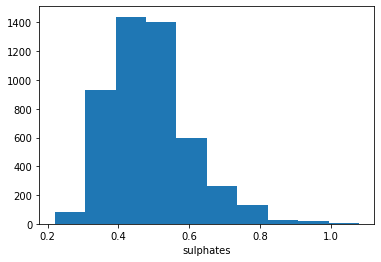

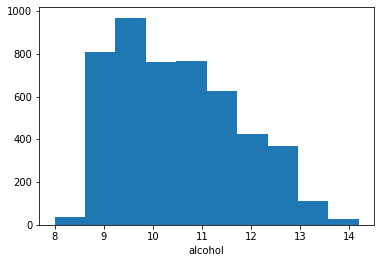

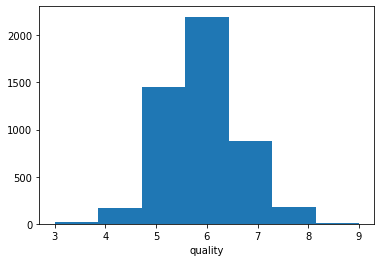

In [ ]:
#plot histograms for continuous variables

for col in df_white.columns.values: #for all columns
  #if the values are integer or discrete
  if(df_white[col].dtypes == 'int64') | (df_white[col].dtypes == 'float64'):
    plt.hist(df_white[col],10 if len(pd.unique(df_white[col]))>20 else len(pd.unique(df_white[col])))
    plt.xlabel(col)
    plt.show()

All variables seems to spread well.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa4a3d11160>,
      dtype=object)

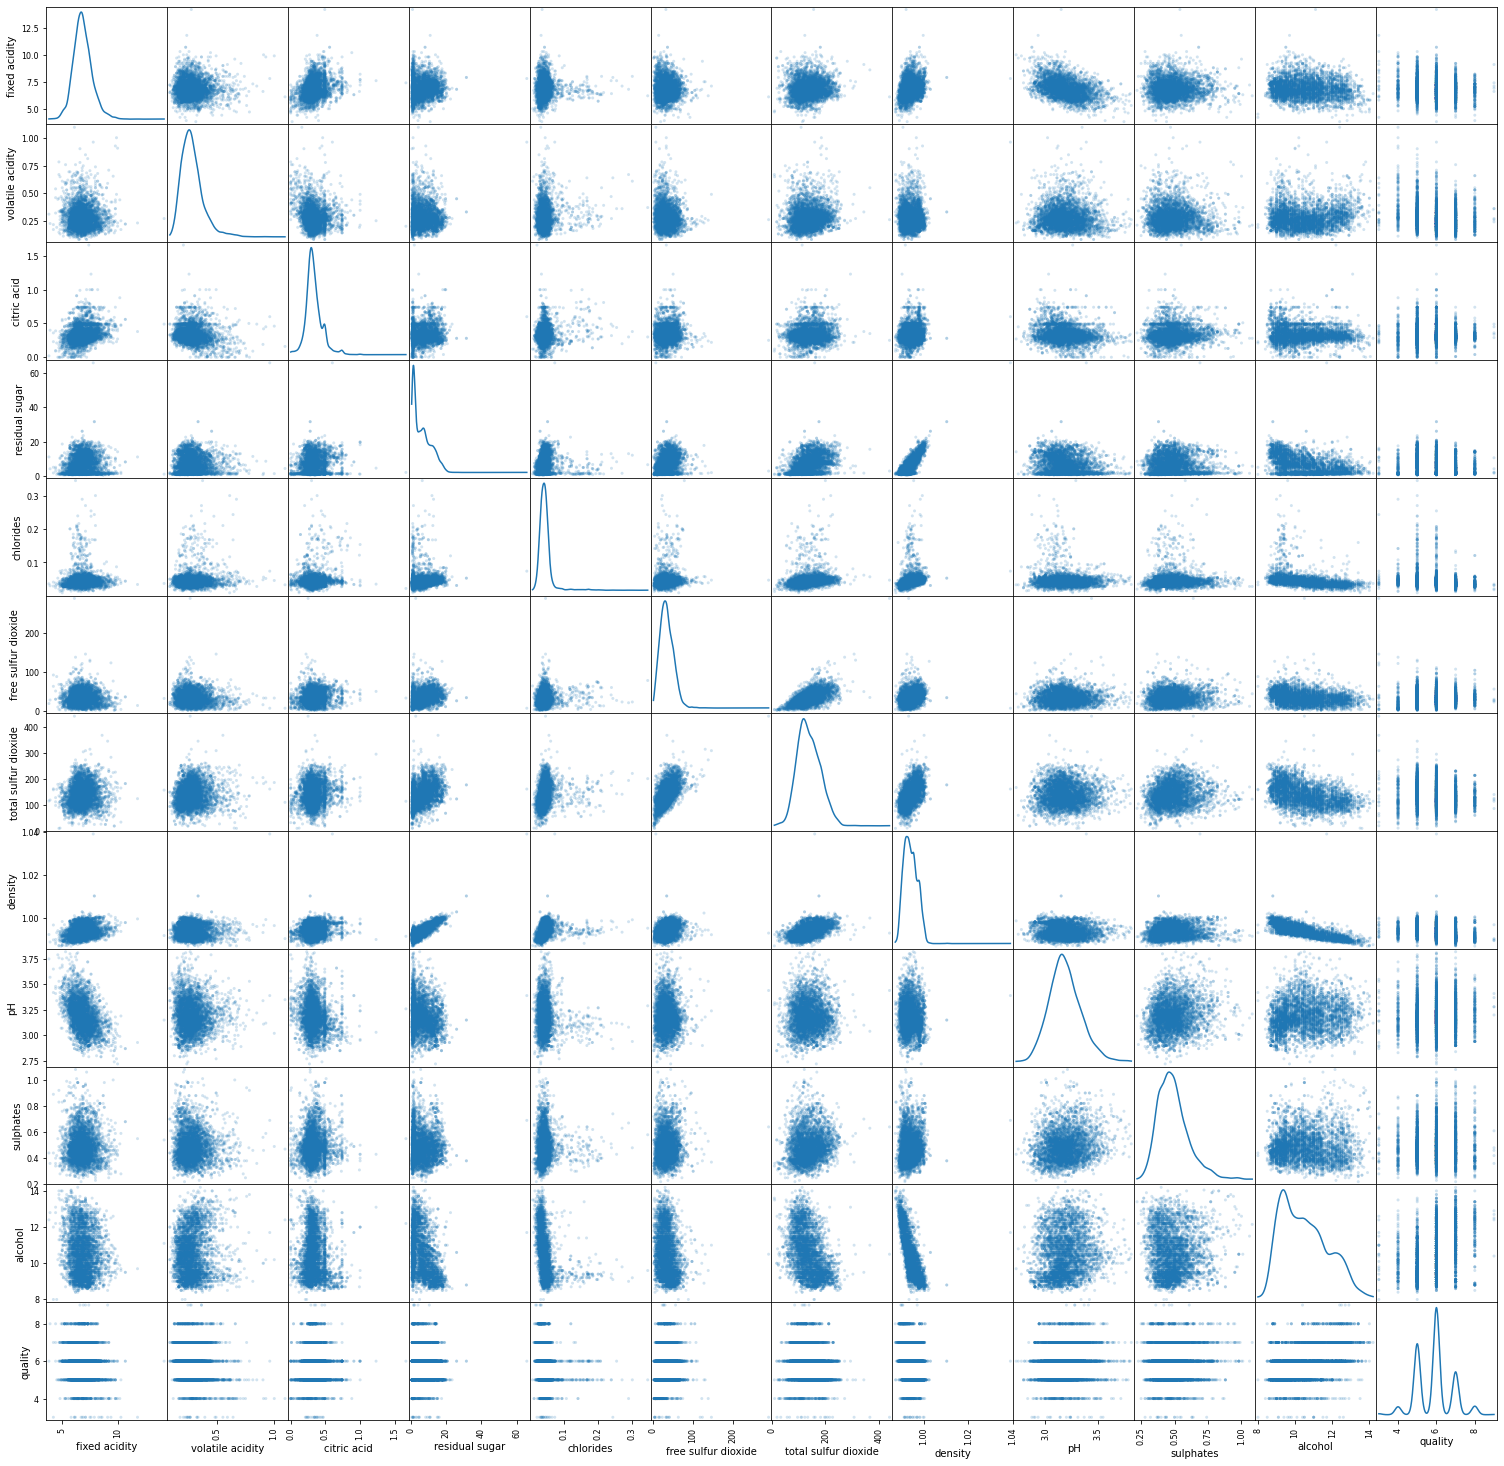

In [ ]:
#we can also plot pairwise scatter matrices(lazy coding)

from pandas.plotting import scatter_matrix
scatter_matrix(df_white,alpha=0.2,figsize=(26,26),diagonal='kde')  #kde is kernal density estimation

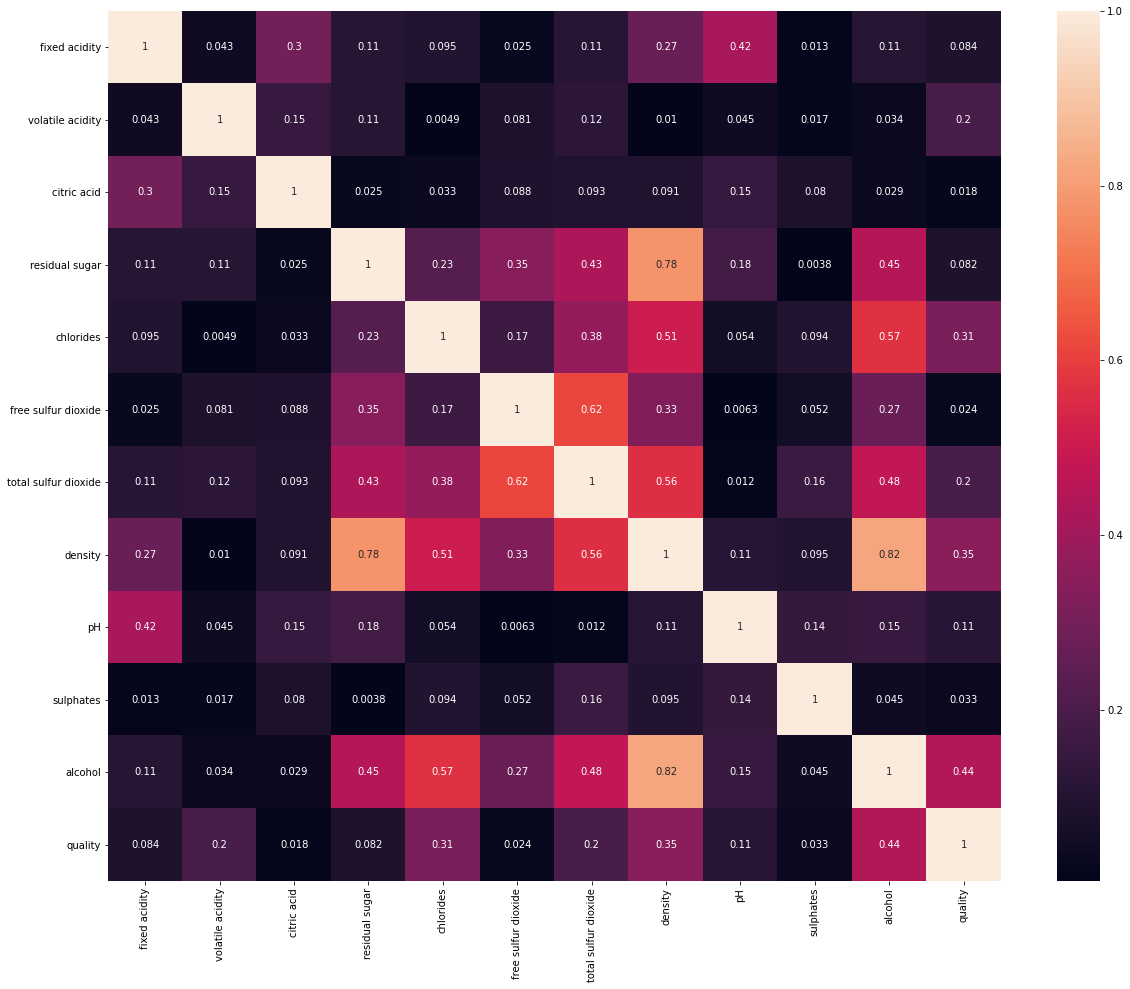

In [ ]:
corrMatrix=df_white.corr(method='spearman') #Use spearman for non-linear
fig,ax=plt.subplots(figsize=(20,16))
sns.heatmap(abs(corrMatrix),annot=True) #show absolute value
plt.show()

/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is de

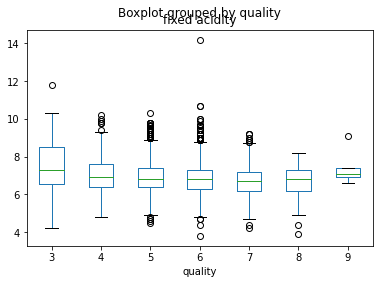

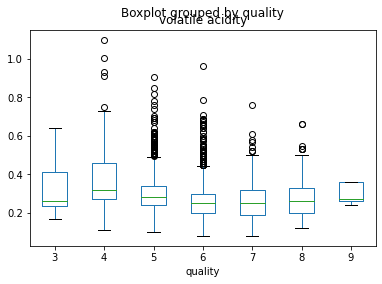

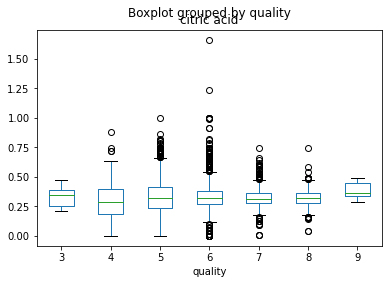

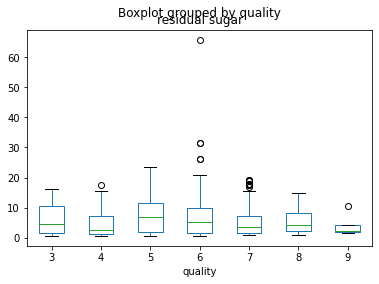

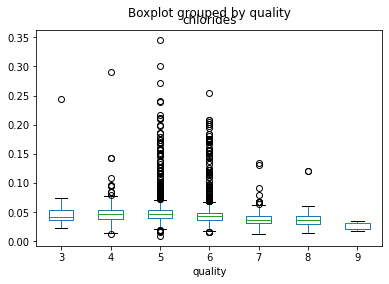

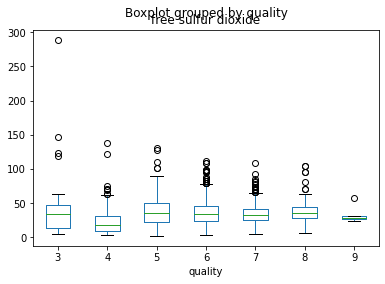

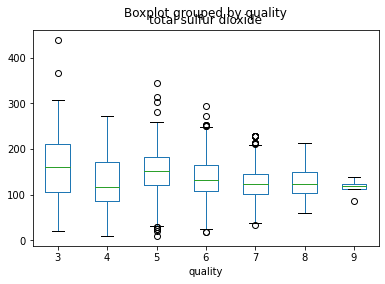

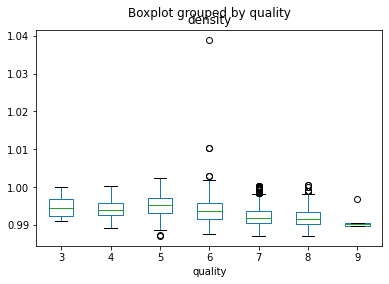

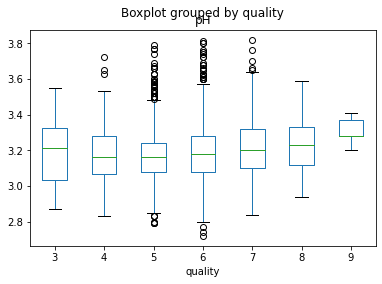

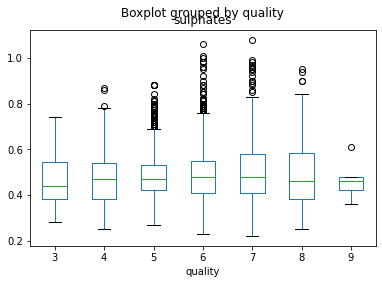

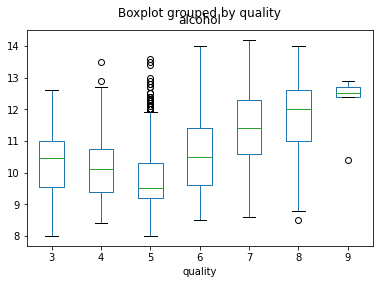

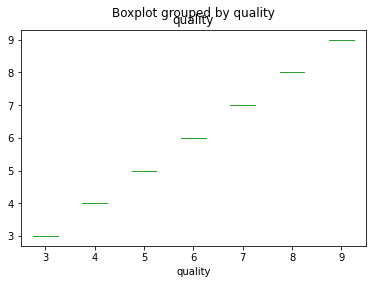

In [ ]:
#Plot side by side boxplot for each variable to find which ones are likely to help predict classes

for col in df_white.columns.values:
    df_white.boxplot(by='quality',column=col, grid=False)

residual sugar can be eliminated.
and free sulphur di oxide can also be igonored because of correlation with total sulphur di oxide.




##Prepare Data
Elimination of useless columns.

Normalize ranges



In [ ]:
X_white = df_white.drop(['residual sugar','free sulfur dioxide','chlorides','quality'],axis='columns')  ##my input columns  
y_white = df_white.quality

,0,1,2,3,4,5,6,7
0,-0.758172,-1.440308,0.457144,3.756487,2.254318,-2.015789,-1.228350,-1.523450
1,-1.160343,-1.272714,0.354443,2.600946,-1.455778,-0.072005,-0.992298,-0.866379
2,-0.126188,-1.384443,0.662546,1.536632,-0.872763,-0.331177,-1.287363,-0.303175
3,-0.643266,-1.663767,0.251743,4.243030,-0.607756,-0.784726,-1.523416,-0.490910
4,-0.643266,-1.663767,0.251743,4.243030,-0.607756,-0.784726,-1.523416,-0.490910
...,...,...,...,...,...,...,...,...
4893,-1.217796,-1.775497,0.097691,1.384587,-2.971617,-0.266384,-0.933285,0.729364
4894,-0.987984,-1.160984,0.457144,3.695669,-0.978765,-1.043897,-1.169337,-0.772512
4895,-1.045437,-1.607903,-0.415813,1.962358,-2.229598,-2.080582,-1.169337,-0.960246
4896,-1.619967,-1.328579,0.149042,1.931949,-4.270150,0.187166,-1.641442,2.231240


0   -0.841601
1   -1.394269
2    0.324617
3    2.794367
4   -1.441268
5   -0.795957
6   -0.993202
7    0.085686
dtype: float64


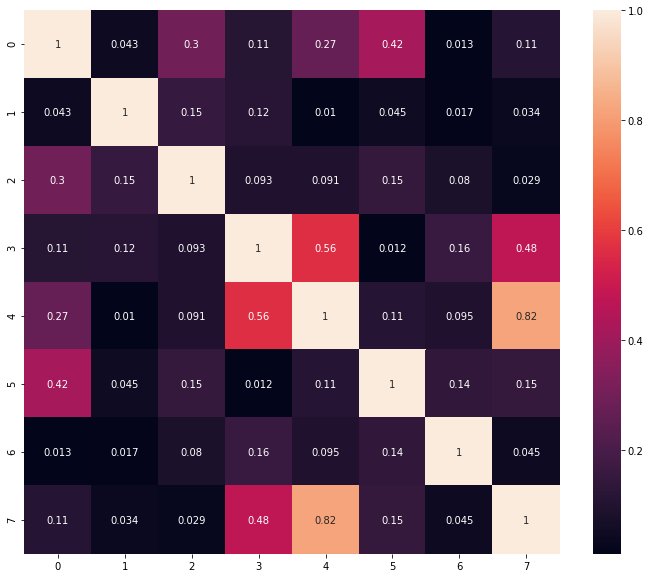

In [ ]:
#normalize data (shift and scale so that columns are 0 mean and unit variance)
from sklearn import preprocessing

scaler_white=preprocessing.StandardScaler() #for data normalisation

scaler_white.fit(X_white) #compute mean and standard deviation
X_white_norm =pd.DataFrame(scaler.transform(X_white)) #use mean and std
display(X_white_norm)
print(X_white_norm.mean())

corrMatrix=X_white_norm.corr(method='spearman') #check correlation again
fig,ax=plt.subplots(figsize=(12,10))
sns.heatmap(abs(corrMatrix),annot=True) 
plt.show()

All means are zero and std deviation are 1.

variables selected seems to uncorrelated with each other.

In [ ]:
from sklearn.model_selection import train_test_split
train_X_white, test_X_white, train_y_white, test_y_white = train_test_split(X_white_norm, y_white,test_size=0.2, random_state=42) ##splitting test data into 20 percent

##L1(Lasso) regularied 

In [ ]:
from sklearn import linear_model
lasso_reg_white = linear_model.Lasso(alpha=0.005)
lasso_reg_white.fit(train_X_white, train_y_white)         ##training model
print('score of lasso_white :')
lasso_reg_white.score(test_X_white, test_y_white)         ##computing test score of model


score of lasso_white :


0.24271443709424367

##L1(LASSO) regularized linear regression using gridsearch

In [ ]:
#First we will use automated grid search over range of hyperparameters

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score  #ROC-AUC and F1 are balanced matrics

from sklearn import linear_model


In [ ]:
hyperparameters={'alpha':[0.005,0.01,0.1],'max_iter':[10,100,1000]}
#these are hyperparameters that we will try

lasso_reg_white = linear_model.Lasso()
clf_lasso_white=GridSearchCV(estimator=lasso_reg_white,param_grid=hyperparameters)
clf_lasso_white.fit(X_white_norm, y_white)
clf_lasso_white.cv_results_


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 223.38627161001705, tolerance: 0.29860980091883743
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 178.7672211292695, tolerance: 0.3019855028075556
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 289.7451237222265, tolerance: 0.30510587034201186
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 107.47

{'mean_fit_time': array([0.00489249, 0.00309753, 0.00303721, 0.00299392, 0.00300155,
        0.0030232 , 0.00254316, 0.00251851, 0.00370493]),
 'mean_score_time': array([0.00165019, 0.00166683, 0.00160751, 0.0015729 , 0.00159655,
        0.00160947, 0.00160704, 0.00161047, 0.00163236]),
 'mean_test_score': array([0.22638299, 0.22629824, 0.22629824, 0.22603284, 0.22609373,
        0.22609373, 0.17150922, 0.17150922, 0.17150922]),
 'param_alpha': masked_array(data=[0.005, 0.005, 0.005, 0.01, 0.01, 0.01, 0.1, 0.1, 0.1],
              mask=[False, False, False, False, False, False, False, False,
                    False],
        fill_value='?',
             dtype=object),
 'param_max_iter': masked_array(data=[10, 100, 1000, 10, 100, 1000, 10, 100, 1000],
              mask=[False, False, False, False, False, False, False, False,
                    False],
        fill_value='?',
             dtype=object),
 'params': [{'alpha': 0.005, 'max_iter': 10},
  {'alpha': 0.005, 'max_iter': 100}

cv_results are not easy to view hence i am geeting them into dataframes


In [ ]:
df1_white = pd.DataFrame(clf_lasso_white.cv_results_)
df1_white.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,param_max_iter,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.004892,0.003648,0.001650,0.000091,0.005,10,"{'alpha': 0.005, 'max_iter': 10}",0.186748,0.267403,0.250140,0.278622,0.149002,0.226383,0.050069,1
1,0.003098,0.000072,0.001667,0.000089,0.005,100,"{'alpha': 0.005, 'max_iter': 100}",0.185170,0.267815,0.249170,0.279665,0.149671,0.226298,0.050315,2
2,0.003037,0.000026,0.001608,0.000017,0.005,1000,"{'alpha': 0.005, 'max_iter': 1000}",0.185170,0.267815,0.249170,0.279665,0.149671,0.226298,0.050315,2
3,0.002994,0.000012,0.001573,0.000030,0.01,10,"{'alpha': 0.01, 'max_iter': 10}",0.193060,0.263264,0.247501,0.273215,0.153124,0.226033,0.045774,6
4,0.003002,0.000036,0.001597,0.000045,0.01,100,"{'alpha': 0.01, 'max_iter': 100}",0.191838,0.263828,0.246988,0.274012,0.153802,0.226094,0.045948,4


In [ ]:
df1_white[['param_alpha','param_max_iter','mean_test_score']]

,param_alpha,param_max_iter,mean_test_score
0,0.005,10,0.226383
1,0.005,100,0.226298
2,0.005,1000,0.226298
3,0.01,10,0.226033
4,0.01,100,0.226094
5,0.01,1000,0.226094
6,0.1,10,0.171509
7,0.1,100,0.171509
8,0.1,1000,0.171509


In [ ]:
clf_lasso_white.best_params_

{'alpha': 0.005, 'max_iter': 10}

In [ ]:
clf_lasso_white.best_score_

0.22638299123772881

##L2(ridge) regularied 

In [ ]:
from sklearn import linear_model
ridge_reg_white= linear_model.Ridge(alpha=0.05, max_iter=1000, tol=0.1)
ridge_reg_white.fit(train_X_white,train_y_white )

Ridge(alpha=0.05, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, random_state=None, solver='auto', tol=0.1)

In [ ]:
ridge_reg_white.score(test_X_white, test_y_white)

0.2396613788771962

##L2(ridge) regularized linear regression using gridsearch

In [ ]:
hyperparameters={'alpha':[0.005,0.01,50],'max_iter':[10,100,1000]}
#these are hyperparameters that we will try

ridge_reg_white = linear_model.Ridge()
clf_ridge_white=GridSearchCV(estimator=ridge_reg_white,param_grid=hyperparameters)
clf_ridge_white.fit(X_white_norm, y_white)
clf_ridge_white.cv_results_


{'mean_fit_time': array([0.00551662, 0.00285392, 0.00268502, 0.00260177, 0.00253601,
        0.00262671, 0.00251627, 0.00252829, 0.00254564]),
 'mean_score_time': array([0.00182066, 0.00175557, 0.00166516, 0.00167017, 0.00167437,
        0.00160584, 0.00160046, 0.00158978, 0.00188737]),
 'mean_test_score': array([0.22445808, 0.22445808, 0.22445808, 0.22445819, 0.22445819,
        0.22445819, 0.22521199, 0.22521199, 0.22521199]),
 'param_alpha': masked_array(data=[0.005, 0.005, 0.005, 0.01, 0.01, 0.01, 50, 50, 50],
              mask=[False, False, False, False, False, False, False, False,
                    False],
        fill_value='?',
             dtype=object),
 'param_max_iter': masked_array(data=[10, 100, 1000, 10, 100, 1000, 10, 100, 1000],
              mask=[False, False, False, False, False, False, False, False,
                    False],
        fill_value='?',
             dtype=object),
 'params': [{'alpha': 0.005, 'max_iter': 10},
  {'alpha': 0.005, 'max_iter': 100},
 

In [ ]:
df2_white = pd.DataFrame(clf_ridge_white.cv_results_)
df2_white.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,param_max_iter,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.005517,0.003171,0.001821,0.000305,0.005,10,"{'alpha': 0.005, 'max_iter': 10}",0.177080,0.268101,0.249978,0.283443,0.143688,0.224458,0.054413,7
1,0.002854,0.000616,0.001756,0.000198,0.005,100,"{'alpha': 0.005, 'max_iter': 100}",0.177080,0.268101,0.249978,0.283443,0.143688,0.224458,0.054413,7
2,0.002685,0.000205,0.001665,0.000089,0.005,1000,"{'alpha': 0.005, 'max_iter': 1000}",0.177080,0.268101,0.249978,0.283443,0.143688,0.224458,0.054413,7
3,0.002602,0.000057,0.001670,0.000077,0.01,10,"{'alpha': 0.01, 'max_iter': 10}",0.177081,0.268101,0.249978,0.283443,0.143688,0.224458,0.054413,4
4,0.002536,0.000032,0.001674,0.000155,0.01,100,"{'alpha': 0.01, 'max_iter': 100}",0.177081,0.268101,0.249978,0.283443,0.143688,0.224458,0.054413,4


In [ ]:
df2_white[['param_alpha','param_max_iter','mean_test_score']]

,param_alpha,param_max_iter,mean_test_score
0,0.005,10,0.224458
1,0.005,100,0.224458
2,0.005,1000,0.224458
3,0.01,10,0.224458
4,0.01,100,0.224458
5,0.01,1000,0.224458
6,50,10,0.225212
7,50,100,0.225212
8,50,1000,0.225212


In [ ]:
clf_ridge_white.best_params_

{'alpha': 50, 'max_iter': 10}

In [ ]:
clf_ridge_white.best_score_

0.22521199458178393

##Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
hyperparameters={'n_estimators':[10,50,1000,2000],'max_depth':[50,100,2000]}
#these are hyperparameters that we will try

random_forest_white = RandomForestClassifier()
clf_random_forest_white=GridSearchCV(estimator=random_forest_white,param_grid=hyperparameters)
clf_random_forest_white.fit(train_X_white, train_y_white)
clf_random_forest_white.cv_results_

{'mean_fit_time': array([ 0.05845785,  0.27401905,  5.46855283, 10.87073231,  0.05607538,
         0.27241759,  5.43987603, 10.83810501,  0.05678654,  0.27871838,
         5.48721995, 10.94827266]),
 'mean_score_time': array([0.0042963 , 0.01463537, 0.26520104, 0.52635756, 0.00427175,
        0.01441994, 0.26435161, 0.57028866, 0.00424743, 0.01496253,
        0.26535921, 0.52942986]),
 'mean_test_score': array([0.62608785, 0.6472649 , 0.65262498, 0.65186097, 0.61816893,
        0.65160457, 0.65211803, 0.65033101, 0.62199872, 0.64752294,
        0.65390244, 0.65134849]),
 'param_max_depth': masked_array(data=[50, 50, 50, 50, 100, 100, 100, 100, 2000, 2000, 2000,
                    2000],
              mask=[False, False, False, False, False, False, False, False,
                    False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_n_estimators': masked_array(data=[10, 50, 1000, 2000, 10, 50, 1000, 2000, 10, 50, 1000,
                    2000],
   

In [ ]:
clf_random_forest_white.score(train_X_white, train_y_white)    ##training accuracy

1.0

In [ ]:
clf_random_forest_white.score(test_X_white, test_y_white)      ##testing accuracy

0.7030612244897959

In [ ]:
df3_white = pd.DataFrame(clf_random_forest_white.cv_results_)
df3_white.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.068960,0.003458,0.004536,0.000069,50,10,"{'max_depth': 50, 'n_estimators': 10}",0.461224,0.456122,0.503061,0.489275,0.525026,0.486942,0.025795,11
1,0.331051,0.003597,0.016836,0.000912,50,50,"{'max_depth': 50, 'n_estimators': 50}",0.506122,0.480612,0.523469,0.516854,0.542390,0.513890,0.020399,8
2,6.541626,0.038576,0.301555,0.006910,50,1000,"{'max_depth': 50, 'n_estimators': 1000}",0.498980,0.503061,0.547959,0.533197,0.522983,0.521236,0.018363,2
3,13.210165,0.091276,0.596642,0.006114,50,2000,"{'max_depth': 50, 'n_estimators': 2000}",0.498980,0.497959,0.539796,0.538304,0.530133,0.521034,0.018718,3
4,0.067404,0.001381,0.004506,0.000101,100,10,"{'max_depth': 100, 'n_estimators': 10}",0.451020,0.468367,0.507143,0.512768,0.513790,0.490618,0.025937,10


In [ ]:
df3_white[['param_n_estimators','param_max_depth','mean_test_score']]

,param_n_estimators,param_max_depth,mean_test_score
0,10,50,0.486942
1,50,50,0.513890
2,1000,50,0.521236
3,2000,50,0.521034
4,10,100,0.490618
5,50,100,0.512867
6,1000,100,0.517153
7,2000,100,0.516541
8,10,2000,0.480410
9,50,2000,0.514704


In [ ]:
clf_random_forest_white.best_params_

{'max_depth': 2000, 'n_estimators': 1000}

In [ ]:
clf_random_forest_white.best_score_

0.5222580308936648

##Testing the model for red with data from white and vice versa

In [ ]:
clf_random_forest_white.score(X_red_norm,y_red)  ##model is random forest of white wine and testing data is of red wine

0.399624765478424

In [ ]:
clf_random_forest_white.score(test_X_white, test_y_white)   ##model is random forest of white wine and testing data is of white wine

0.7030612244897959

In [ ]:
clf_random_forest.score(X_white_norm, y_white)         ##model is random forest of red wine and testing data is of white wine

0.43344222131482235

In [ ]:
clf_random_forest.score(test_X_red, test_y_red)           ##model is random forest of red wine and testing data is of red wine

0.659375

## the model for red wines is not applicable to white wines and vice- versa .

Because the score is getting dropped too much.Hence one model is not good for predicting the other one.